In [1]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import os
from datetime import datetime,date
from geopy.distance import geodesic
from tqdm import tqdm
import numpy as np
from matplotlib.ticker import PercentFormatter
from shapely import geometry
from PlaceIQ_process import all_path,aggragate_data,mkdir,process_org_file,create_fishnet
import pickle
import time
from scipy import stats

In [2]:
os.getcwd()

'/panfs/jay/groups/13/dizhu/ma000523/IIDS_intra_urban_scale_directional/Deep_learning_FR/visitation_data'

In [3]:
def aggragate_week_data(data):
    d1=pd.concat(data) 
#     d1.reset_index(inplace=True)
    d1=d1.drop(columns=['Unnamed: 0'])
    return d1

# collect the data within in the same data

In [4]:
# for i in tqdm(range(17,24)):
#     path_current='/home/ma000523/CFEP/2021/unattributed_july21_visit/unattributed_july21_aggragated/dt=202107'+str(i)+'.csv'
#     path_after='/home/ma000523/CFEP/2021/unattributed_july21_visit/unattributed_july21_aggragated/dt=202107'+str(i+1)+'.csv'
#     df_current=pd.read_csv(path_current)
#     df_after=pd.read_csv(path_after)
#     date_current = datetime(2021, 7, i, 0, 0, 0)
#     date_after = datetime(2021, 7, i+1, 0, 0, 0)
#     unix_current=time.mktime(date_current.timetuple())
#     unix_after=time.mktime(date_after.timetuple())
# #     print(unix_current,unix_after)
#     df_current=df_current[df_current.unix_time>=unix_current]
#     df_addition=df_after[df_after.unix_time<unix_after]
#     df_new=pd.concat([df_current,df_addition])
#     df_new.to_csv('data/dt=202107'+str(i)+'.csv')

In [4]:
weekday_vist_list=[]
weekend_vist_list=[]
for i in range(19,24):
    path='data/dt=202107'+str(i)+'.csv'
    weekday_vist_list.append(path)
    
for i in range(17,19):
    path='data/dt=202107'+str(i)+'.csv'
    weekend_vist_list.append(path)

In [5]:
weekend_vist_list
# weekday_vist_list

['data/dt=20210717.csv', 'data/dt=20210718.csv']

In [8]:
# a='/home/ma000523/CFEP/2021/unattributed_april21/unattributed_april21_agg_by_oneday/dt=20210401.csv'
d=pd.read_csv(weekday_vist_list[0])
d

,Unnamed: 0,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon
0,0,34671178977,2021-07-19 12:21:58,1626715318,45.057000,-92.863200
1,1,50655906051,2021-07-19 09:29:01,1626704941,45.049300,-92.901000
2,2,135572777951,2021-07-19 18:46:02,1626738362,45.041800,-92.883500
3,3,63685434257,2021-07-19 13:02:24,1626717744,45.057700,-92.863400
4,4,135658211129,2021-07-19 13:28:25,1626719305,45.041738,-92.903373
...,...,...,...,...,...,...
1225602,1263992,58259753549,2021-07-19 19:53:16,1626742396,45.124000,-93.127300
1225603,1264002,135622446530,2021-07-19 19:32:03,1626741123,44.937800,-93.370400
1225604,1264009,76169987987,2021-07-19 19:20:46,1626740446,44.945150,-93.182194
1225605,1264010,107543497568,2021-07-19 20:00:38,1626742838,45.148500,-93.147000


In [9]:
d.columns

Index(['Unnamed: 0', 'device_key', 'date_time', 'unix_time',
       'visit_centroid_lat', 'visit_centroid_lon'],
      dtype='object')

In [5]:
index=['202107'+str(i) for i in range(17,24)]
device_key_number=[]
visit_record_number=[]
Start_time=[]
End_time=[]
print(index)
    
for i in range(len(weekend_vist_list)):
    df=pd.read_csv(weekend_vist_list[i])
    device_key_number.append(len(df.device_key.unique()))
    visit_record_number.append(len(df))
    Start_time.append(df[df.unix_time==min(df.unix_time)].date_time.unique()[0])
    End_time.append(df[df.unix_time==max(df.unix_time)].date_time.unique()[0])
    
for i in range(len(weekday_vist_list)):
    df=pd.read_csv(weekday_vist_list[i])
    device_key_number.append(len(df.device_key.unique()))
    visit_record_number.append(len(df))
    Start_time.append(df[df.unix_time==min(df.unix_time)].date_time.unique()[0])
    End_time.append(df[df.unix_time==max(df.unix_time)].date_time.unique()[0])

['20210717', '20210718', '20210719', '20210720', '20210721', '20210722', '20210723']


In [11]:
device_key_number

[99310, 103560, 102920, 103298, 104678, 105662, 106806]

In [6]:
visit_data_stat=pd.DataFrame({'Unique device number':device_key_number,
                              'Visit record number':visit_record_number,
                              'Start time':Start_time,'End time':End_time},index=index)
visit_data_stat

,Unique device number,Visit record number,Start time,End time
20210717,99310,1276553,2021-07-17 00:00:00,2021-07-17 23:59:59
20210718,103560,1142349,2021-07-18 00:00:00,2021-07-18 23:59:59
20210719,102920,1225607,2021-07-19 00:00:00,2021-07-19 23:59:58
20210720,103298,1272779,2021-07-20 00:00:00,2021-07-20 23:59:59
20210721,104678,1304657,2021-07-21 00:00:00,2021-07-21 23:59:59
20210722,105662,1333211,2021-07-22 00:00:00,2021-07-22 23:59:59
20210723,106806,1440796,2021-07-23 00:00:00,2021-07-23 23:59:59


In [8]:
visit_data_stat['Unique device number'].sum(),visit_data_stat['Visit record number'].sum()

(726234, 8995952)

In [14]:
# start_date_time = datetime(2021, 4, 12, 0, 0)
# start_unix_time = time.mktime(start_date_time.timetuple())
# end_date_time = datetime(2021, 4, 13, 0, 0)
# end_unix_time = time.mktime(end_date_time.timetuple())
# print('Orignial row number: ',len(df))
# df=df[(df.unix_time>=start_unix_time) & (df.unix_time<end_unix_time)]
# print('Row number after select by time: ',len(df))
df=pd.read_csv(weekday_vist_list[0])

In [ ]:
print('Start time:',df[df.unix_time==min(df.unix_time)].date_time.unique()[0])
print('End time:',df[df.unix_time==max(df.unix_time)].date_time.unique()[0])

ERROR 1: PROJ: proj_create_from_database: Open of /home/dizhu/ma000523/.conda/envs/ma_CFEP_env/share/proj failed


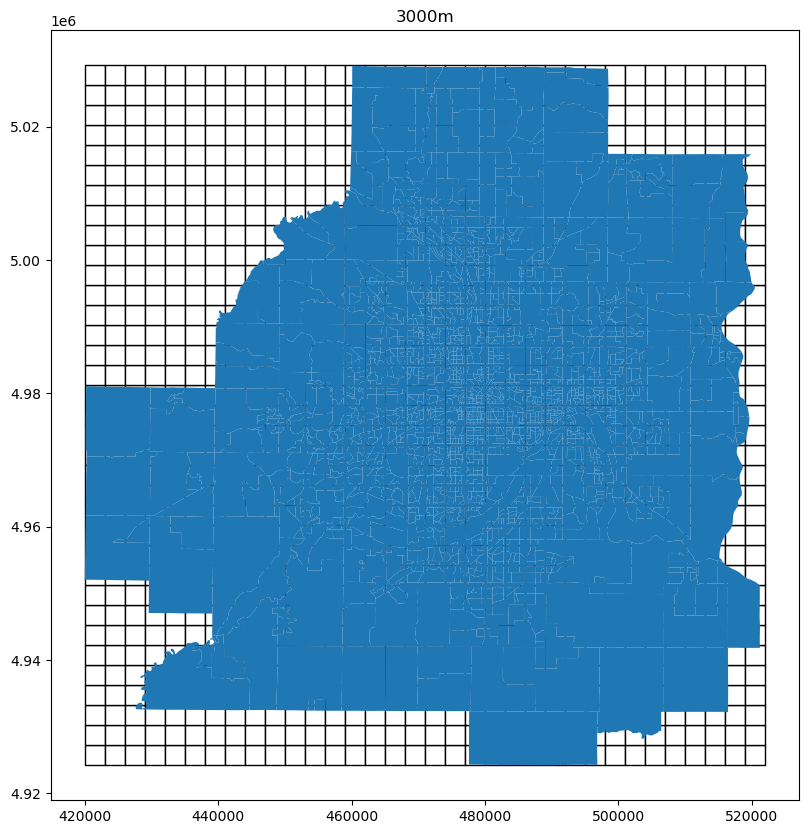

In [2]:
boundary_path='cbg_TCMA.geojson'
boundary=gpd.read_file(boundary_path)
boundary
boundary_26915 = boundary.to_crs('EPSG:26915')
fishnet_3km=create_fishnet(boundary_26915,3000)

In [29]:
boundary_26915.total_bounds[2]-boundary_26915.total_bounds[0],boundary_26915.total_bounds[3]-boundary_26915.total_bounds[1]

(101289.28975223994, 104944.61353423167)

In [19]:
county_boundary=boundary.dissolve(by='County').to_crs('EPSG:26915')
county_boundary.bounds

,minx,miny,maxx,maxy
County,,,,
Anoka County,459769.177900,4.986918e+06,498558.270608,5.029157e+06
Carver County,419967.132152,4.942635e+06,458883.019798,4.981084e+06
Dakota County,473906.905815,4.924213e+06,521256.421904,4.974433e+06
Hennepin County,439416.548530,4.959171e+06,486008.073167,5.010479e+06
Ramsey County,482056.985563,4.970456e+06,501248.276258,4.996810e+06
Scott County,427602.168003,4.932330e+06,477948.192058,4.962272e+06
Washington County,498297.536102,4.954718e+06,520487.606352,5.015937e+06


In [23]:
county_boundary.area

County
Anoka County         1.154419e+09
Carver County        9.734363e+08
Dakota County        1.518655e+09
Hennepin County      1.569816e+09
Ramsey County        4.401584e+08
Scott County         9.533650e+08
Washington County    1.094204e+09
dtype: float64

In [26]:
(county_boundary.bounds['maxx']-county_boundary.bounds['minx'])['Hennepin County'],(county_boundary.bounds['maxy']-county_boundary.bounds['miny'])['Hennepin County']

(46591.524637011986, 51308.74871331919)

In [28]:
(county_boundary.bounds['maxx']-county_boundary.bounds['minx'])['Ramsey County'],(county_boundary.bounds['maxy']-county_boundary.bounds['miny'])['Ramsey County']

(19191.29069546482, 26353.419107150286)

In [4]:
path_list=['correct_time/dt='+str(20210700+i)+'.csv' for i in range(1,10)]
fishnet_3km=gpd.read_file('fishnet_3km.json')

In [5]:
def visit_traj_OD(vist_file_list,fishnet_3km, boundary):
    visit2traj_number=[]
    inter_cell_trip=[]
    intra_cell_trip=[]
    for path in vist_file_list:
        df=pd.read_csv(path)
        df_sort=df.sort_values(by=['device_key', 'unix_time'])
        visit2traj=pd.DataFrame(columns=['device_key', 'visit_start_lat',
                                         'visit_start_lon', 'visit_end_lat', 
                                         'visit_end_lon'])
        device_key=[]
        visit_start_lat=[]
        visit_start_lon=[]
        visit_end_lat=[]
        visit_end_lon=[]
        for i in tqdm(range(len(df_sort))):
            if i+1==len(df_sort):
                break
            if df_sort.iloc[i,:].device_key==df_sort.iloc[i+1,:].device_key:
                device_key.append(df_sort.iloc[i,:].device_key)
                visit_start_lat.append(df_sort.iloc[i,:].visit_centroid_lat)
                visit_start_lon.append(df_sort.iloc[i,:].visit_centroid_lon)
                visit_end_lat.append(df_sort.iloc[i+1,:].visit_centroid_lat)
                visit_end_lon.append(df_sort.iloc[i+1,:].visit_centroid_lon)
        visit2traj['device_key']=device_key
        visit2traj['visit_start_lat']=visit_start_lat
        visit2traj['visit_start_lon']=visit_start_lon
        visit2traj['visit_end_lat']=visit_end_lat
        visit2traj['visit_end_lon']=visit_end_lon
        visit2traj.to_csv('visit2traj/dt='+str(20210700+i)+'_visit2traj.csv',index = False)
        
        visit2traj_number.append(len(visit2traj))

        d1=visit2traj.copy()
        gdf_d1_o= gpd.GeoDataFrame(d1, 
                                   geometry=gpd.points_from_xy(d1.visit_start_lon, d1.visit_start_lat))
        d1=visit2traj.copy()
        gdf_d1_d= gpd.GeoDataFrame(d1, 
                                   geometry=gpd.points_from_xy(d1.visit_end_lon, d1.visit_end_lat))
        gdf_d1_o.crs= "EPSG:4326" 
        gdf_d1_d.crs= "EPSG:4326" 

        fishnet=fishnet_3km.to_crs(boundary.crs)
        gdf_d1_o=gdf_d1_o.to_crs(boundary.crs)
        gdf_d1_d=gdf_d1_d.to_crs(boundary.crs)

        o_with_cell = gpd.sjoin(gdf_d1_o, fishnet, how="inner")
        d_with_cell = gpd.sjoin(gdf_d1_d, fishnet, how="inner")

        original_index='index_right'
        renamed_index=['cell_o','cell_d']

        # original_index='CensusBlockGroup'
        # renamed_index=['cbg_o','cbg_d']

        o_with_cell=o_with_cell.rename(columns={original_index:renamed_index[0]})
        d_with_cell=d_with_cell.rename(columns={original_index:renamed_index[1]})

        od_cell=pd.concat([o_with_cell,d_with_cell[renamed_index[1]]],axis=1)
        inter_cell_trip.append(len(od_cell[od_cell[renamed_index[0]]==od_cell[renamed_index[1]]]))
        intra_cell_trip.append(len(od_cell[od_cell[renamed_index[0]]!=od_cell[renamed_index[1]]]))
        print(len(od_cell[od_cell[renamed_index[0]]==od_cell[renamed_index[1]]]),len(od_cell[od_cell[renamed_index[0]]!=od_cell[renamed_index[1]]]))
        od_cell=od_cell[od_cell[renamed_index[0]]!=od_cell[renamed_index[1]]]

        od_cell['flow']=0
        od_cell_groupby=od_cell.groupby(['cell_o','cell_d'],as_index=False)['flow'].count()
        od_cell_groupby.to_csv(os.getcwd()+'/od_table/'+path.split('/')[-1], index = False)
    return visit2traj_number,inter_cell_trip,intra_cell_trip
    
weekday_visit2traj_number,weekday_inter_cell_trip,weekday_intra_cell_trip=visit_traj_OD(path_list,fishnet_3km, boundary)
# weekend_visit2traj_number,weekend_inter_cell_trip,weekend_intra_cell_trip=visit_traj_OD(weekend_vist_list,fishnet_3km, boundary)



100%|█████████▉| 1268652/1268653 [15:19<00:00, 1379.62it/s]


674210 492640


100%|█████████▉| 1187508/1187509 [14:15<00:00, 1388.30it/s]


629871 460586


100%|█████████▉| 1018621/1018622 [12:15<00:00, 1385.68it/s]


548563 385224


100%|█████████▉| 927535/927536 [11:21<00:00, 1361.59it/s]


501594 343647


100%|█████████▉| 956043/956044 [11:29<00:00, 1387.01it/s]


506649 354462


100%|█████████▉| 1055541/1055542 [12:40<00:00, 1387.81it/s]


554486 403056


100%|█████████▉| 1200773/1200774 [14:41<00:00, 1362.78it/s]


643446 456954


100%|█████████▉| 1251049/1251050 [15:07<00:00, 1378.27it/s]


673120 475738


100%|█████████▉| 1321732/1321733 [15:58<00:00, 1378.44it/s]


714002 504048


In [ ]:
visit2traj_number=weekday_visit2traj_number+weekend_visit2traj_number
inter_cell_trip=weekday_inter_cell_trip+weekend_inter_cell_trip
intra_cell_trip=weekday_intra_cell_trip+weekend_intra_cell_trip
visit_data_stat['visit2traj_number']=visit2traj_number
visit_data_stat['trips with in cells']=inter_cell_trip
visit_data_stat['trips between cells']=intra_cell_trip
visit_data_stat

In [ ]:
print('Unique device number: the number of unique devices')
print('Visit record number:  the number of visit records after being filtered by device_key and cluster_type')
print('Start time:           the earliest time of records')
print('End time:             the latest time of records')
print('visit2traj_number:    the number of trips derived from visit')
print('trips with in cells:  the number of trips that happened within the 3-km cell')
print('trips between cells:  the number of trips between the 3-km cell')

In [11]:
weekday_od_list=[]
weekend_od_list=[]
for i in range(19,24):
    path=os.getcwd()+'/od_table_July17_23/dt=202107'+str(i)+'.csv'
    weekday_od_list.append(pd.read_csv(path))
    
for i in range(17,19):
    path=os.getcwd()+'/od_table_July17_23/dt=202107'+str(i)+'.csv'
    weekend_od_list.append(pd.read_csv(path))

In [18]:
weekend_od_list[1]

,Unnamed: 0,cell_o,cell_d,flow
0,0,19,20,7
1,1,19,21,1
2,2,19,53,1
3,3,19,360,1
4,4,19,392,1
...,...,...,...,...
60447,60447,1182,1139,1
60448,60448,1182,1147,1
60449,60449,1182,1148,2
60450,60450,1182,1180,1


In [19]:
weekday_od=aggragate_week_data(weekday_od_list)
weekend_od=aggragate_week_data(weekend_od_list)

In [20]:
od_cell_weekday_groupby=weekday_od.groupby(['cell_o','cell_d'],as_index=False).sum()
od_cell_weekday_groupby=od_cell_weekday_groupby.rename(columns={'flow':'total_flow'})

od_cell_weekend_groupby=weekend_od.groupby(['cell_o','cell_d'],as_index=False).sum()
od_cell_weekend_groupby=od_cell_weekend_groupby.rename(columns={'flow':'total_flow'})

In [22]:
od_cell_weekday_groupby.to_csv(os.getcwd()+'/od_table_July17_23/od_weekday_sum_flow.csv')
od_cell_weekend_groupby.to_csv(os.getcwd()+'/od_table_July17_23/od_weekend_sum_flow.csv')

In [ ]:
def get_graph(od_cell):
#     od_cell['flow']=0
#     od_cell_groupby=od_cell.groupby(['cell_o','cell_d'],as_index=False)['flow'].count()
    # set up graph
    Di_G = nx.DiGraph()
    edges=[]
    for name,group in od_cell.iterrows():
        edges.append((group['cell_o'],group['cell_d'],group['total_flow']))
    Di_G.add_weighted_edges_from(edges)
    od_list=od_cell[['cell_o','cell_d']].values.tolist()
    count=0
    two_direction_edge=[]
    unqiue_weighted_edge=[]
    for od in tqdm(od_list):
        if [od[0],od[1]] in od_list and [od[1],od[0]] in od_list:
            if [od[0],od[1]] not in two_direction_edge and [od[1],od[0]] not in two_direction_edge:
                unqiue_weighted_edge.append((od[0],od[1],Di_G[od[1]][od[0]]['weight']+Di_G[od[0]][od[1]]['weight']))
                two_direction_edge.append([od[0],od[1]])
                two_direction_edge.append([od[1],od[0]])
        else:
            unqiue_weighted_edge.append((od[0],od[1],Di_G[od[0]][od[1]]['weight']))

    G=nx.Graph()
    G.add_weighted_edges_from(unqiue_weighted_edge)
    
    return G,Di_G

In [24]:
weekday_G,weekday_Di_G=get_graph(od_cell_weekday_groupby)
weekend_G,weekend_Di_G=get_graph(od_cell_weekend_groupby)

100%|██████████████████████████████████████| 87626/87626 [04:20<00:00, 336.68it/s]


In [25]:
for edge in weekday_G.edges():
    weekday_G[edge[0]][edge[1]]['weight']=weekday_G[edge[0]][edge[1]]['weight']/5

for edge in weekend_G.edges():
    weekend_G[edge[0]][edge[1]]['weight']=weekend_G[edge[0]][edge[1]]['weight']/2

In [26]:
nx.write_gexf(weekday_G,os.getcwd()+'/P_N_network/avg_weekday_july21.gexf')
nx.write_gexf(weekend_G,os.getcwd()+'/P_N_network/avg_weekend_july21.gexf')

In [27]:
print(weekday_G[19][20]['weight'],weekend_G[19][20]['weight'])

6.8 8.5


In [29]:
def sum_weight(g_list):
    weight_list=[]
    for g in g_list:
        total_weight=0
        for edge in g.edges(data=True):
            total_weight+=edge[2]['weight']
        weight_list.append(total_weight)

    return weight_list
def get_negative_edge(G_t1,G_t2):
    # general weight change rate is 1
    # in positive pattern, select edges by determining if F_g2/F_g1 - 1
    negative_edge_G_t1=[]
    negative_edge_G_t2=[]
    G_list=sum_weight([G_t1,G_t2])
    for edge1 in tqdm(G_t1.edges()):
        if G_t2[edge1[0]][edge1[1]]['weight']==0:
            continue
        edge_change_rate=G_t1[edge1[0]][edge1[1]]['weight']/G_t2[edge1[0]][edge1[1]]['weight']-G_list[0]/G_list[1]
        if edge_change_rate<0:
            negative_edge_G_t1.append([edge1[0],edge1[1],G_t1[edge1[0]][edge1[1]]['weight']])
            negative_edge_G_t2.append([edge1[0],edge1[1],G_t2[edge1[0]][edge1[1]]['weight']])

    G_n1=nx.Graph()
    G_n2=nx.Graph()

    G_n1.add_weighted_edges_from([(edge[0],edge[1],edge[2]) for edge in negative_edge_G_t1])
    G_n2.add_weighted_edges_from([(edge[0],edge[1],edge[2]) for edge in negative_edge_G_t2])
    return G_n1,G_n2

def std_topology(weekday_G,weekend_G):
    G_d1_copy=weekday_G.copy()
    G_d2_copy=weekend_G.copy()
    G_d2_edge_list=list(G_d2_copy.edges())
    G_d1_edge_list=list(G_d1_copy.edges())
    # print(G_d2_edge_list)
    added_edge_d1=[]
    added_edge_d2=[]
    for edge in tqdm(G_d2_edge_list):
        if edge not in G_d1_edge_list and (edge[1],edge[0]) not in G_d1_edge_list:
            added_edge_d1.append((edge[1],edge[0],0))

    G_d1_copy.add_weighted_edges_from(added_edge_d1)

    for edge in tqdm(G_d1_edge_list):
        if edge not in G_d2_edge_list and (edge[1],edge[0]) not in G_d2_edge_list:
            added_edge_d2.append((edge[1],edge[0],0))

    G_d2_copy.add_weighted_edges_from(added_edge_d2)
    
    return G_d1_copy,G_d2_copy

In [9]:
weekday_G=nx.read_gexf(os.getcwd()+'/P_N_network/avg_weekday_july21.gexf')
weekend_G=nx.read_gexf(os.getcwd()+'/P_N_network/avg_weekend_july21.gexf')

In [11]:
len(weekday_G.edges()),len(weekend_G.edges())

(81383, 58039)

In [14]:
len(weekday_G.nodes()),len(weekend_G.nodes())

(918, 916)

In [23]:
sum((dict(weekday_G.degree()).values()))/len(weekday_G.nodes()),sum((dict(weekend_G.degree()).values()))/len(weekend_G.nodes())


(177.3050108932462, 126.72270742358079)

In [24]:
nx.average_clustering(weekday_G),nx.average_clustering(weekend_G)

(0.6177412369927736, 0.5455795843043476)

In [30]:
sum_weight([weekday_G,weekend_G])

[508776.20000025077, 447611.5]

In [2]:
508776.20000025077*5

2543881.000001254

In [3]:
447611.5*2

895223.0

In [4]:
2543881.000001254+895223.0

3439104.000001254

In [33]:
len(fishnet_3km)

925

In [12]:
G_list=sum_weight([weekday_G,weekend_G])
num=0
for edge in weekday_G.edges(data=True):
    if edge[2]['weight']!=0:
        num+=1
        
print('weekday network',G_list[0]/num)
        
num=0
for edge in weekend_G.edges(data=True):
    if edge[2]['weight']!=0:
        num+=1
        
print('weekend network',G_list[1]/num)
print('weekday network and weekend network',G_list)
print('weekday network / weekend network',G_list[0]/G_list[1])


weekday network 6.251627489773672
weekend network 7.712253829321663
weekday network and weekend network [508776.20000025077, 447611.5]
weekday network / weekend network 1.1366468466521766


In [46]:
print('The total weight of weekday network is larger than the total weight of weekend network')

The total weight of weekday network is larger than the total weight of weekend network


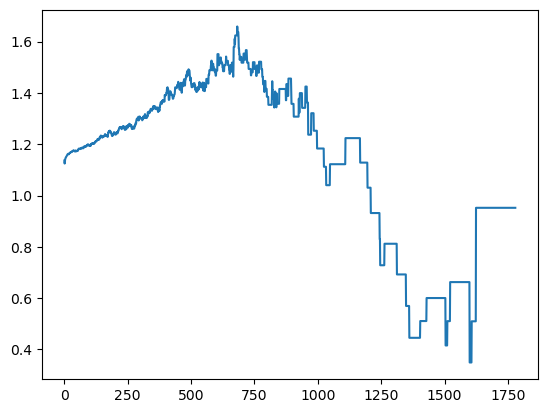

In [107]:
change_rate_change=[]
for i in range(int(max(weekday_weights))):

    flow_filter=i

    weekday_weights=[edge[2]['weight'] for edge in weekday_G.edges(data=True)]
    weekday_weights=np.array(weekday_weights)
    weekday_weights_5=weekday_weights[weekday_weights>=flow_filter]

    weekend_weights=[edge[2]['weight'] for edge in weekend_G.edges(data=True)]
    weekend_weights=np.array(weekend_weights)
    weekend_weights_5=weekend_weights[weekend_weights>=flow_filter]
    
    change_rate_change.append(sum(weekday_weights_5)/sum(weekend_weights_5))

plt.plot(change_rate_change)

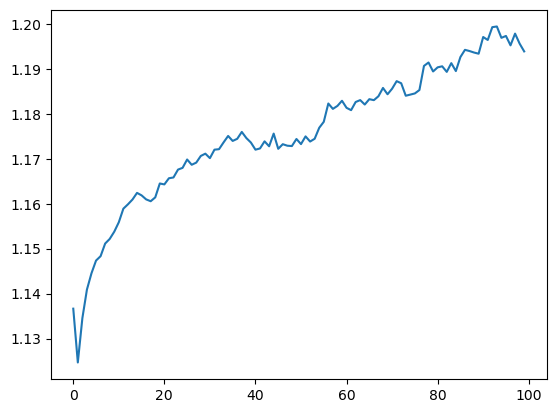

In [104]:
plt.plot(change_rate_change[:100])

In [35]:
flow_filter=2

weekday_weights=[edge[2]['weight'] for edge in weekday_G.edges(data=True)]
weekday_weights=np.array(weekday_weights)
weekday_weights_5=weekday_weights[weekday_weights>=flow_filter]
print('weekday')
print('The total flow number and max weight: ',len(weekday_weights),max(weekday_weights))
print('The number and sum of flow with the weight more than '+str(flow_filter)+' :',len(weekday_weights_5), sum(weekday_weights_5))
print('The number and sum of flow with the weight less than '+str(flow_filter)+' :',len(weekday_weights)-len(weekday_weights_5),sum(weekday_weights)-sum(weekday_weights_5))
print('Bins size:',(max(weekday_weights)-min(weekday_weights))/30)

weekend_weights=[edge[2]['weight'] for edge in weekend_G.edges(data=True)]
weekend_weights=np.array(weekend_weights)
weekend_weights_5=weekend_weights[weekend_weights>=flow_filter]
print('weekend')
print('The total flow number and max weight: ',len(weekend_weights),max(weekend_weights))
print('The number and sum of flow with the weight more than '+str(flow_filter)+' :',len(weekend_weights_5),sum(weekend_weights_5))
print('The number and sum of flow with the weight less than '+str(flow_filter)+' :',len(weekend_weights)-len(weekend_weights_5),sum(weekend_weights)-sum(weekend_weights_5))

weekday
The total flow number and max weight:  92669 1780.4
The number and sum of flow with the weight more than 2 : 21756 475939.800000009
The number and sum of flow with the weight less than 2 : 70913 32836.40000024176
Bins size: 59.34666666666667
weekend
The total flow number and max weight:  92669 1870.0
The number and sum of flow with the weight more than 2 : 21976 419499.5
The number and sum of flow with the weight less than 2 : 70693 28112.0


1.0 0.6
7.712253829321663 6.251627489770591


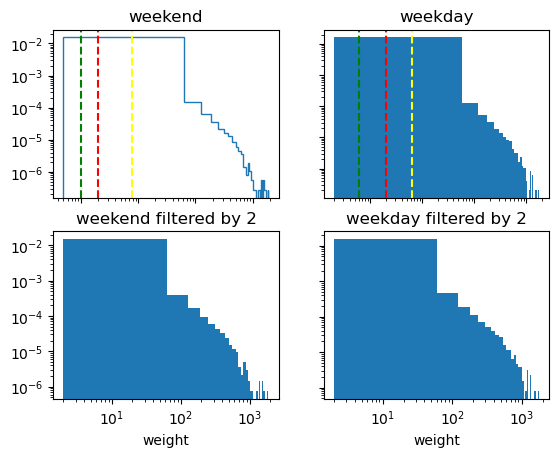

In [13]:
fig, axs = plt.subplots(2, 2)
weekend_weights_median=np.median(weekend_weights)
weekday_weights_median=np.median(weekday_weights)
weekend_weights_mean=np.mean(weekend_weights)
weekday_weights_mean=np.mean(weekday_weights)
print(weekend_weights_median,weekday_weights_median)
print(weekend_weights_mean,weekday_weights_mean)
axs[0, 0].hist(weekend_weights,bins=30,density=True,histtype=u'step')
axs[0, 0].axvline(flow_filter,c='red',ls='--')
axs[0, 0].axvline(weekend_weights_median,c='green',ls='--')
axs[0, 0].axvline(weekend_weights_mean,c='yellow',ls='--')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].set_title('weekend')

axs[0, 1].hist(weekday_weights,bins=30,density=True)
axs[0, 1].axvline(flow_filter,c='red',ls='--')
axs[0, 1].axvline(weekday_weights_median,c='green',ls='--')
axs[0, 1].axvline(weekday_weights_mean,c='yellow',ls='--')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].set_title('weekday')

axs[1, 0].hist(weekend_weights_5,bins=30,density=True)
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].set_title('weekend filtered by '+str(flow_filter))

axs[1, 1].hist(weekday_weights_5,bins=30,density=True)
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].set_title('weekday filtered by '+str(flow_filter))

for ax in axs.flat:
    ax.set(xlabel='weight')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0.5, 1.0, 'weekend')

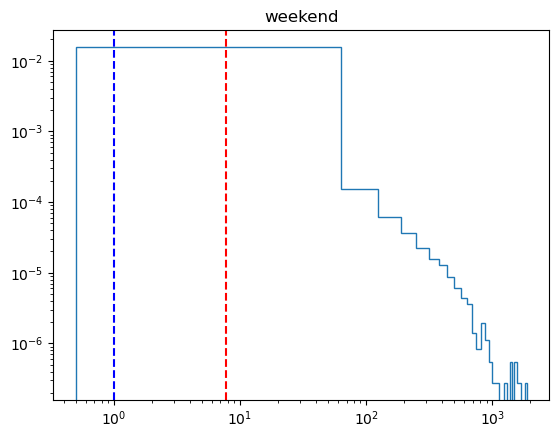

In [16]:
plt.hist(weekend_weights,bins=30,density=True,histtype=u'step')
# plt.axvline(flow_filter,c='red',ls='--')
plt.axvline(weekend_weights_median,c='blue',ls='--')
plt.axvline(weekend_weights_mean,c='red',ls='--')
plt.yscale('log')
plt.xscale('log')
plt.title('weekend')

In [36]:
# weekday_G,weekend_G=std_topology(weekday_G,weekend_G)
weekday_G=nx.read_gexf(os.getcwd()+'/P_N_network/std_topology_weekday_july21.gexf')
weekend_G=nx.read_gexf(os.getcwd()+'/P_N_network/std_topology_weekend_july21.gexf')
print(len(weekday_G.edges()),len(weekend_G.edges()))
weekday_remove=[]
weekend_remove=[]
weekday_g_edge_more_1=weekday_G.copy()
weekend_g_edge_more_1=weekend_G.copy()

for edge in weekday_G.edges(data=True):
    if weekday_G[edge[0]][edge[1]]['weight']<flow_filter and weekend_G[edge[0]][edge[1]]['weight']<flow_filter:
        weekday_g_edge_more_1.remove_edge(edge[0],edge[1])
        weekend_g_edge_more_1.remove_edge(edge[0],edge[1])
        weekday_remove.append([edge[0],edge[1]])
        weekend_remove.append([edge[0],edge[1]])
        
print(len(weekday_g_edge_more_1.edges()))        


# for edge in weekend_G.edges(data=True):
#     if edge[2]['weight']<1:
#         weekend_g_edge_more_1.remove_edge(edge[0],edge[1])
#         weekend_remove.append([edge[0],edge[1]])
print(len(weekend_g_edge_more_1.edges()))


92669 92669
26628
26628


In [39]:
std_network_sum=sum_weight([weekday_g_edge_more_1,weekend_g_edge_more_1])
print(std_network_sum)
print(std_network_sum[0]/std_network_sum[1])

[480611.4000000084, 423637.5]
1.1344873860317097


In [55]:
# nx.write_gexf(weekday_G,os.getcwd()+'/P_N_network/std_topology_weekday_july21.gexf')
# nx.write_gexf(weekend_G,os.getcwd()+'/P_N_network/std_topology_weekend_july21.gexf')

In [9]:
print(len(weekday_G.edges()),len(weekend_G.edges()))

92669 92669


In [50]:
weekday_remove_rate=[]
weekday_remove_weight=[]
weekend_remove_weight=[]
for edge in weekday_remove:
#     if weekend_G.has_edge(edge[0],edge[1]) and weekday_G.has_edge(edge[0],edge[1]):
    if weekend_G[edge[0]][edge[1]]['weight']!=0:
        p_change_rate=weekday_G[edge[0]][edge[1]]['weight']/weekend_G[edge[0]][edge[1]]['weight']
        weekday_remove_rate.append(p_change_rate)
    weekday_remove_weight.append(weekday_G[edge[0]][edge[1]]['weight'])
    weekend_remove_weight.append(weekend_G[edge[0]][edge[1]]['weight'])
#         if p_change_rate>20:
#             print(weekday_G[edge[0]][edge[1]]['weight'],weekend_G[edge[0]][edge[1]]['weight'],[edge[0]],[edge[1]])
        
weekend_remove_rate=[]
for edge in weekend_remove:
#     if weekend_G.has_edge(edge[0],edge[1]) and weekday_G.has_edge(edge[0],edge[1]):
    if weekend_G[edge[0]][edge[1]]['weight']!=0:
        n_change_rate=weekday_G[edge[0]][edge[1]]['weight']/weekend_G[edge[0]][edge[1]]['weight']
        weekend_remove_rate.append(n_change_rate)
#         if n_change_rate>25:
#             print(weekday_G[edge[0]][edge[1]]['weight'],weekend_G[edge[0]][edge[1]]['weight'],[edge[0]],[edge[1]])

3.6
0.0


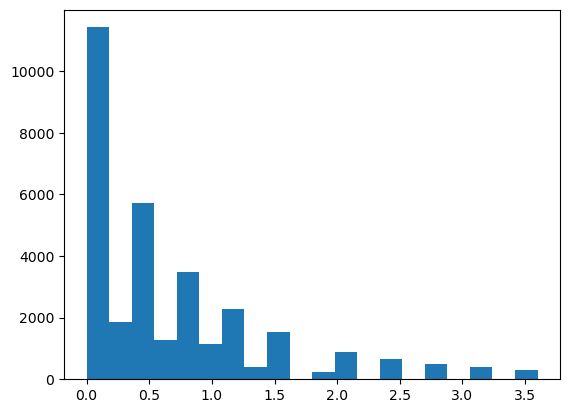

In [51]:
print(max(weekend_remove_rate))
print(min(weekday_remove_rate))

weekend_remove_rate_arr=np.array(weekend_remove_rate)
plt.hist(weekend_remove_rate_arr,bins=20)#[weekend_remove_rate_arr>3]
plt.show()

Text(0, 0.5, 'weekend')

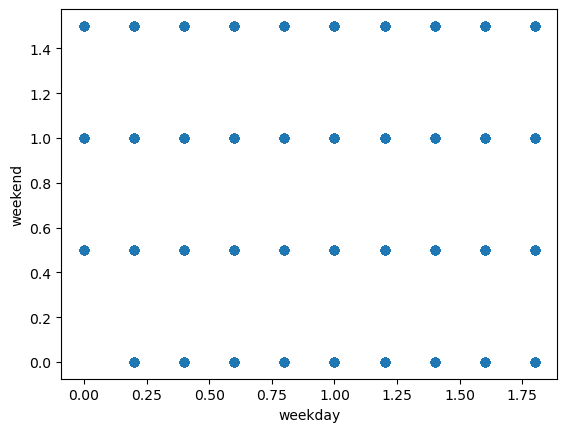

In [52]:
plt.scatter(weekday_remove_weight,weekend_remove_weight,alpha=0.1)
plt.xlabel('weekday')
plt.ylabel('weekend')

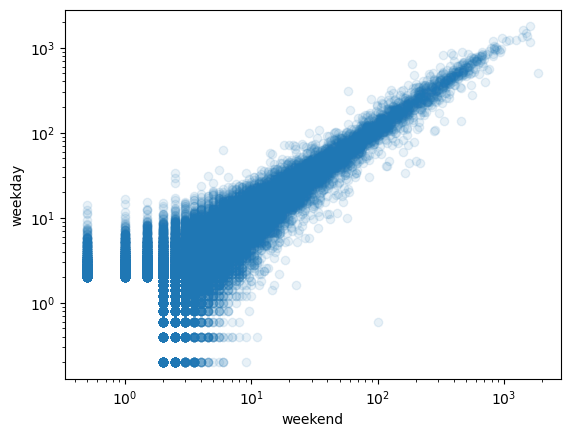

In [33]:
weekday_keep_weight=[]
weekend_keep_weight=[]
for edge in weekday_g_edge_more_1.edges():
    weekday_keep_weight.append(weekday_g_edge_more_1[edge[0]][edge[1]]['weight'])
    weekend_keep_weight.append(weekend_g_edge_more_1[edge[0]][edge[1]]['weight'])

# plt.subplot(1,2,1)
plt.scatter(weekend_keep_weight,weekday_keep_weight,alpha=0.1)
# plt.xlim([20,1750])
# plt.ylim([20,1870])
plt.xlabel('weekend')
plt.ylabel('weekday')
plt.xscale('log')
plt.yscale('log')


# plt.subplot(1,2,2)
# plt.scatter(weekday_keep_weight[:250],weekend_keep_weight[:250],alpha=0.1)
# plt.xlabel('weekday')
# plt.ylabel('weekend')

In [53]:
weekday_g,weekend_g=std_topology(weekday_g_edge_more_1,weekend_g_edge_more_1)
G_list=sum_weight([weekday_g,weekend_g])
num=0
for edge in weekday_g.edges(data=True):
    if edge[2]['weight']!=0:
        num+=1
print(G_list[0]/num)
        
num=0
for edge in weekend_g.edges(data=True):
    if edge[2]['weight']!=0:
        num+=1
        
print(G_list[1]/num)
print(G_list)
print(G_list[0]/G_list[1])

100%|███████████████████████████████████| 26628/26628 [00:15<00:00, 1755.52it/s]

18.296459570580495
16.328290614761997
[480611.4000000084, 423637.5]
1.1344873860317097


In [37]:
print(len(weekday_g.edges()),len(weekend_g.edges()))

26628 26628


In [54]:
def get_positive_edge(G_t1,G_t2):
    # general weight change rate is 1
    # in positive pattern, select edges by determining if F_g2/F_g1 - 1
    positive_edge_G_t1=[]
    positive_edge_G_t2=[]
    rate=[]
    G_list=sum_weight([G_t1,G_t2])
    print(G_list[0]/G_list[1])
    for edge1 in tqdm(G_t1.edges()):
        if G_t2[edge1[0]][edge1[1]]['weight']==0:
            positive_edge_G_t1.append([edge1[0],edge1[1],G_t1[edge1[0]][edge1[1]]['weight']])
            positive_edge_G_t2.append([edge1[0],edge1[1],G_t2[edge1[0]][edge1[1]]['weight']])
        else:
            edge_change_rate=G_t1[edge1[0]][edge1[1]]['weight']/G_t2[edge1[0]][edge1[1]]['weight']-G_list[0]/G_list[1]
            if edge_change_rate>0:
                rate.append(edge_change_rate+1)
                positive_edge_G_t1.append([edge1[0],edge1[1],G_t1[edge1[0]][edge1[1]]['weight']])
                positive_edge_G_t2.append([edge1[0],edge1[1],G_t2[edge1[0]][edge1[1]]['weight']])
    
    G_p1=nx.Graph()
    G_p2=nx.Graph()

    G_p1.add_weighted_edges_from([(edge[0],edge[1],edge[2]) for edge in positive_edge_G_t1])
    G_p2.add_weighted_edges_from([(edge[0],edge[1],edge[2]) for edge in positive_edge_G_t2])
    return G_p1,G_p2

def get_negative_edge(G_t1,G_t2):
    # general weight change rate is 1
    # in positive pattern, select edges by determining if F_g2/F_g1 - 1
    negative_edge_G_t1=[]
    negative_edge_G_t2=[]
    G_list=sum_weight([G_t1,G_t2])
    print(G_list[0]/G_list[1])
    for edge1 in tqdm(G_t1.edges()):
        if G_t2[edge1[0]][edge1[1]]['weight']==0:
            continue
        edge_change_rate=G_t1[edge1[0]][edge1[1]]['weight']/G_t2[edge1[0]][edge1[1]]['weight']-G_list[0]/G_list[1]
        if edge_change_rate<0:
            negative_edge_G_t1.append([edge1[0],edge1[1],G_t1[edge1[0]][edge1[1]]['weight']])
            negative_edge_G_t2.append([edge1[0],edge1[1],G_t2[edge1[0]][edge1[1]]['weight']])

    G_n1=nx.Graph()
    G_n2=nx.Graph()

    G_n1.add_weighted_edges_from([(edge[0],edge[1],edge[2]) for edge in negative_edge_G_t1])
    G_n2.add_weighted_edges_from([(edge[0],edge[1],edge[2]) for edge in negative_edge_G_t2])
    return G_n1,G_n2

In [55]:
N_weekday_g,N_weekend_g=get_negative_edge(weekday_g,weekend_g)
P_weekday_g,P_weekend_g=get_positive_edge(weekday_g,weekend_g)

1.1344873860317097


100%|█████████████████████████████████| 26628/26628 [00:00<00:00, 217270.89it/s]

1.1344873860317097



100%|█████████████████████████████████| 26628/26628 [00:00<00:00, 283988.67it/s]


In [56]:
print(len(P_weekday_g.edges()),len(N_weekday_g.edges()))
G_list=sum_weight([N_weekday_g,N_weekend_g])
print(G_list[0]/G_list[1])
G_list=sum_weight([P_weekday_g,P_weekend_g])
print(G_list[0]/G_list[1])

12823 13805
0.8619384649716786
1.4537444708125624


In [41]:
weekday_zero_flow=0
weekend_zero_flow=0
weekend_flow_with_end_0=[]
for edge in N_weekday_g.edges():
    if N_weekday_g[edge[0]][edge[1]]['weight']==0:
        weekday_zero_flow+=1
        weekend_flow_with_end_0.append(N_weekend_g[edge[0]][edge[1]]['weight'])
    if N_weekend_g[edge[0]][edge[1]]['weight']==0:
        weekend_zero_flow+=1
print(weekday_zero_flow,weekend_zero_flow)

360 0


55.5


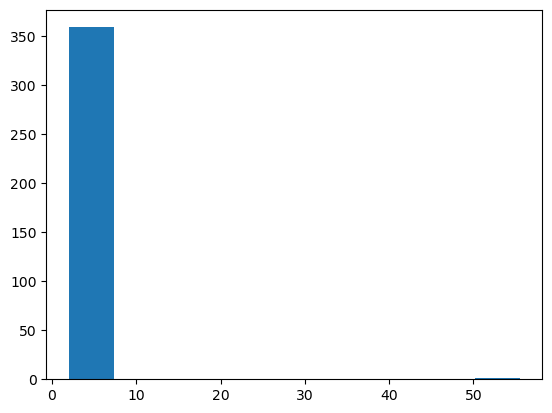

In [42]:
print(max(weekend_flow_with_end_0))
plt.hist(weekend_flow_with_end_0)
plt.show()

In [43]:
weekday_zero_flow=0
weekend_zero_flow=0
weekday_flow_with_end_0=[]
for edge in P_weekday_g.edges():
    if P_weekday_g[edge[0]][edge[1]]['weight']==0:
        weekday_zero_flow+=1
    if P_weekend_g[edge[0]][edge[1]]['weight']==0:
        weekend_zero_flow+=1
        weekday_flow_with_end_0.append(P_weekday_g[edge[0]][edge[1]]['weight'])
print(weekday_zero_flow,weekend_zero_flow)

0 683


In [95]:
# print(max(weekday_flow_with_end_0))
# plt.hist(weekday_flow_with_end_0)
# plt.show()

In [44]:
P_rate=[]
for edge in P_weekday_g.edges():
    if P_weekend_g[edge[0]][edge[1]]['weight']!=0:
        P_rate.append(P_weekday_g[edge[0]][edge[1]]['weight']/P_weekend_g[edge[0]][edge[1]]['weight'])
    
N_rate=[]
for edge in N_weekday_g.edges():
    N_rate.append(N_weekday_g[edge[0]][edge[1]]['weight']/N_weekend_g[edge[0]][edge[1]]['weight'])

1.1345454545454545 12140


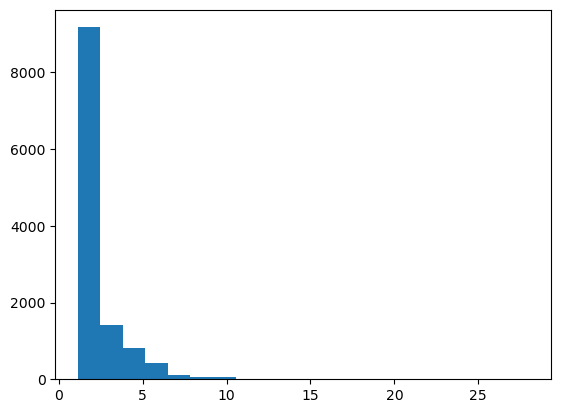

In [45]:
print(min(P_rate),len(P_rate))
plt.hist(P_rate,bins=20)
plt.show()

1.1344262295081968 13805


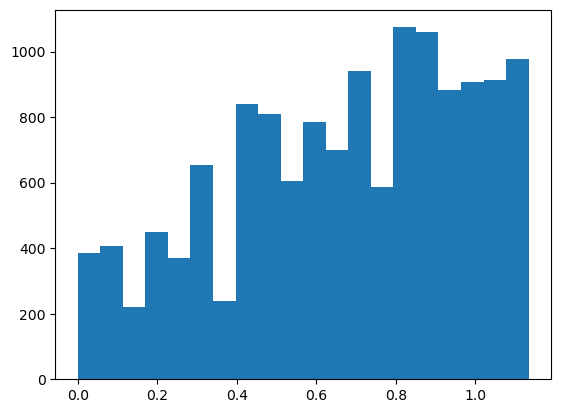

In [46]:
print(max(N_rate),len(N_rate))
plt.hist(N_rate,bins=20)
plt.show()

In [47]:
nx.write_gexf(P_weekday_g,os.getcwd()+'/P_N_network/more_than_2/avg_weekday_P_edge_compare_weekend2weekday.gexf')
nx.write_gexf(P_weekend_g,os.getcwd()+'/P_N_network/more_than_2/avg_weekend_P_edge_compare_weekend2weekday.gexf')

In [48]:
nx.write_gexf(N_weekday_g,os.getcwd()+'/P_N_network/more_than_2/avg_weekday_N_edge_compare_weekend2weekday.gexf')
nx.write_gexf(N_weekend_g,os.getcwd()+'/P_N_network/more_than_2/avg_weekend_N_edge_compare_weekend2weekday.gexf')

# calculate the distance of flow as weight

In [8]:
weekday_G=nx.read_gexf(os.getcwd()+'/P_N_network/std_topology_weekday_july21.gexf')
path='/home/ma000523/CFEP/2021/unattributed_april21/unattributed_april21_od_table/'
fishnet_cell_location=pd.read_csv(path+'fishnet_cell_location.csv')

In [16]:
fishnet_cell_location.head()

,Unnamed: 0,id,name,lat,lon
0,0,19,19,44.484406,-93.270789
1,1,20,20,44.484490,-93.233063
2,2,21,21,44.484560,-93.195336
3,3,22,22,44.484619,-93.157609
4,4,23,23,44.484664,-93.119882


In [28]:
G_distance=weekday_G.copy()
for edge in tqdm(weekday_G.edges()):
#     print(edge[0],edge[1])
    start_lat=fishnet_cell_location[fishnet_cell_location.name==int(edge[0])].lat.values[0]
    start_lon=fishnet_cell_location[fishnet_cell_location.name==int(edge[0])].lon.values[0]
    end_lat=fishnet_cell_location[fishnet_cell_location.name==int(edge[1])].lat.values[0]
    end_lon=fishnet_cell_location[fishnet_cell_location.name==int(edge[1])].lon.values[0]
    dist=geodesic((start_lat,start_lon),(end_lat,end_lon)).km
    G_distance[edge[0]][edge[1]]['weight']=dist

100%|██████████████████████████████████████████████████████| 92669/92669 [02:00<00:00, 766.21it/s]


In [6]:
# G_distance['20']['19']
G_distance.subgraph(['19','20','22']).edges(data=True)

EdgeDataView([('19', '20', {'id': '0', 'weight': 3.0011856611030168}), ('19', '22', {'id': '2', 'weight': 9.003568635436645}), ('22', '20', {'id': '52', 'weight': 6.002382974332946})])

In [4]:
G_distance=nx.read_gexf(os.getcwd()+'/P_N_network/std_G_distance.gexf')
nx.diameter(G_distance.subgraph(['19','20','22']),weight='weight')

9.003568635435963

In [2]:
nx.__version__

'3.1'

In [29]:
dist_list=[]
for edge in G_distance.edges():
    dist_list.append(G_distance[edge[0]][edge[1]]['weight'])
    
print(max(dist_list),min(dist_list))

104.52434571439528 3.0009727418712355


In [30]:
# nx.write_gexf(G_distance,os.getcwd()+'/P_N_network/std_G_distance.gexf')

# scaling factor

In [47]:
P_weekend_g=nx.read_gexf(os.getcwd()+'/P_N_network/more_than_2/avg_weekend_P_edge_compare_weekend2weekday.gexf')
N_weekend_g=nx.read_gexf(os.getcwd()+'/P_N_network/more_than_2/avg_weekend_N_edge_compare_weekend2weekday.gexf')

Mean: 15.214926304296966
persentage: 0.8572876861888794


100%|██████████████████████████████████████████████████| 12823/12823 [00:00<00:00, 1616821.29it/s]


(array([4.652e+03, 2.515e+03, 1.272e+03, 8.080e+02, 5.340e+02, 3.850e+02,
        2.870e+02, 2.280e+02, 1.670e+02, 1.450e+02, 1.465e+03, 1.850e+02,
        7.200e+01, 4.800e+01, 2.600e+01, 1.700e+01, 8.000e+00, 6.000e+00,
        1.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

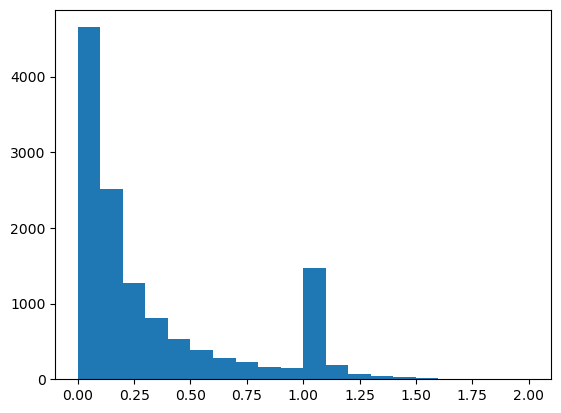

In [48]:
# np.mean(weekend_weights)
weekend_weights=[P_weekend_g[edge[0]][edge[1]]['weight'] for edge in P_weekend_g.edges()]
mean_value=sum(weekend_weights)/len(weekend_weights)
print('Mean:',mean_value)
print('persentage:', 1-len([weight for weight in weekend_weights if mean_value<=weight])/len(weekend_weights))
weekend_zscore=stats.zscore(weekend_weights)
weekend_zscore_norm=[]
max_weekend_zscore=max(weekend_zscore)
min_weekend_zscore=min(weekend_zscore)
for score in tqdm(weekend_zscore):
    if score>0:
        weekend_zscore_norm.append(1+score/max_weekend_zscore)
    else:
        weekend_zscore_norm.append((score-min_weekend_zscore)/(-min_weekend_zscore))
# plt.hist(weekend_zscore[weekend_zscore>1],bins=20)
# normal_mean=(np.mean(weekend_weights)-min(weekend_weights))/(max(weekend_weights)-min(weekend_weights))
# weekend_score=((weekend_weights-min(weekend_weights))/(np.mean(weekend_weights)-min(weekend_weights)))#/normal_mean
plt.hist(weekend_zscore_norm,bins=20)#[weekend_score>1]

Mean: 16.55461789206809
persentage: 0.851792828685259


100%|██████████████████████████████████████████████████| 13805/13805 [00:00<00:00, 1546702.82it/s]


(array([5.262e+03, 2.260e+03, 1.226e+03, 8.400e+02, 6.310e+02, 4.940e+02,
        3.830e+02, 2.770e+02, 2.110e+02, 1.750e+02, 1.857e+03, 1.200e+02,
        3.900e+01, 1.300e+01, 7.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

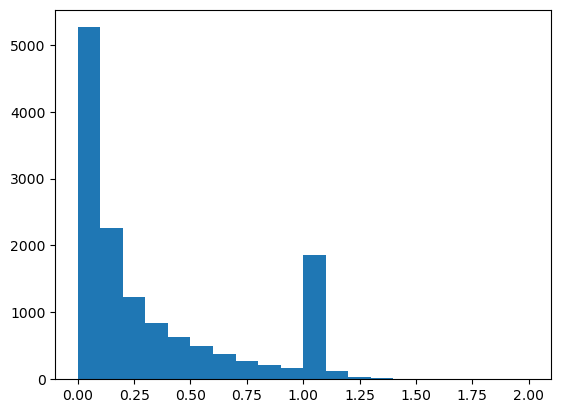

In [49]:
# np.mean(weekend_weights)
weekend_weights=[N_weekend_g[edge[0]][edge[1]]['weight'] for edge in N_weekend_g.edges()]
mean_value=sum(weekend_weights)/len(weekend_weights)
print('Mean:',mean_value)
print('persentage:', 1-len([weight for weight in weekend_weights if mean_value<=weight])/len(weekend_weights))
weekend_zscore=stats.zscore(weekend_weights)
weekend_zscore_norm=[]
max_weekend_zscore=max(weekend_zscore)
min_weekend_zscore=min(weekend_zscore)
for score in tqdm(weekend_zscore):
    if score>0:
        weekend_zscore_norm.append(1+score/max_weekend_zscore)
    else:
        weekend_zscore_norm.append((score-min_weekend_zscore)/(-min_weekend_zscore))
# plt.hist(weekend_zscore[weekend_zscore>1],bins=20)
# normal_mean=(np.mean(weekend_weights)-min(weekend_weights))/(max(weekend_weights)-min(weekend_weights))
# weekend_score=((weekend_weights-min(weekend_weights))/(np.mean(weekend_weights)-min(weekend_weights)))#/normal_mean
plt.hist(weekend_zscore_norm,bins=20)